In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
def x_val(row, max_b):
    return row['epoch_num'] + row['batch_num'] / max_b

def add_x_col(df):
    max_batch = df['batch_num'].max()
    df['x_val'] = df.apply(lambda row: x_val(row, max_batch), axis=1)
    return df

In [114]:
dataset = 'Circ_BonW'

dfs = []

for model_num in range(4):
    model_name = '%s_model%01d'%(dataset, model_num+1)
    csv_path = 'models/%s/%s_loss_data.csv'%(model_name, model_name)
    dfs.append(pd.read_csv(csv_path))

In [115]:
for df in dfs:
    add_x_col(df)

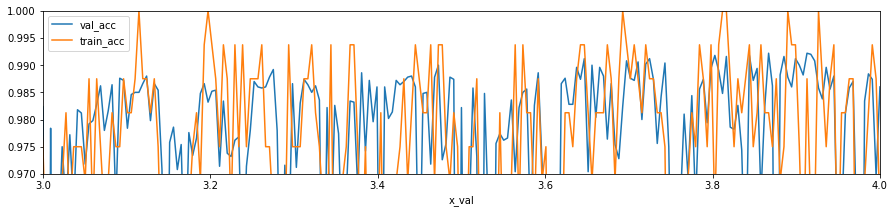

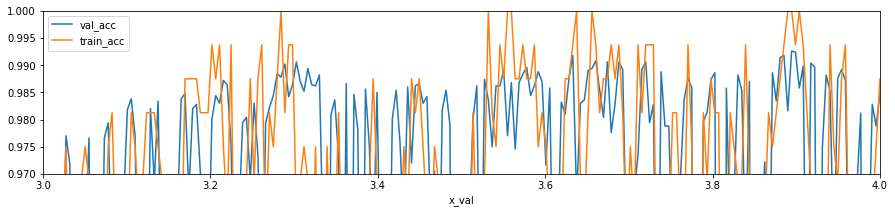

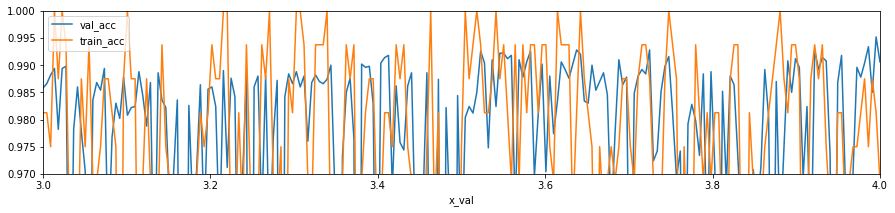

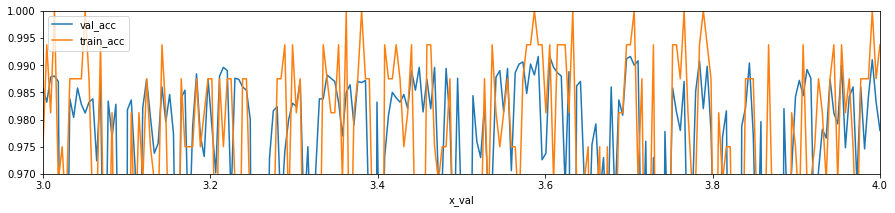

In [116]:
for df in dfs:
    df.plot.line(x='x_val', y=['val_acc', 'train_acc'], xlim=[3,4], ylim=[.97, 1], figsize=(15,3))

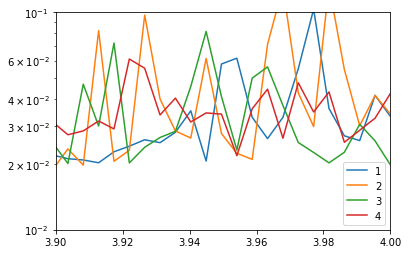

In [119]:
fig = plt.figure()

for i, df in enumerate(dfs):
    plt.plot(df['x_val'], df['avg_val_loss'], label=str(i+1))


plt.legend()
plt.yscale('log')
plt.xlim(3.9, 4)
plt.ylim(1e-2, 0.1)
plt.show()